# Offensive Language Detection in Tweeter 
### Primary Exploratory Data Analysis For OLID dataset ~ 13K tweets



In [1]:
pip install tweet-preprocessor

  Using cached tweet_preprocessor-0.6.0-py3-none-any.whl (27 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import preprocessor as p
import re
import matplotlib.pyplot as plt
import spacy 
import pickle


In [3]:
nlp = spacy.load("en")
from spacy.lang.en.stop_words import STOP_WORDS

In [4]:
# convering the  training data to data fram 
train_df = pd.read_csv ('olid_training.csv')

In [5]:
test_df = pd.read_csv("test_data.csv")

In [6]:
test_df.head(5)

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


In [7]:
train_df.head(5)

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [8]:
labels_levela = pd.read_csv("labels-levela.csv", names=['id', 'label'])

In [9]:
labels_levela.head(5)

,id,label
0,15923,OFF
1,27014,NOT
2,30530,NOT
3,13876,NOT
4,60133,OFF


In [10]:
len(labels_levela)

860

In [11]:
train_df.head(5)

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [12]:
train_df.shape

(13240, 5)

In [13]:
train_df['subtask_a'].value_counts()

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [14]:
# just keeping the tweet and subtask_a columns - change the name of subtask_a to label
train_data = train_df[['tweet', 'subtask_a']]
train_data = train_data.rename(columns={'subtask_a': 'label'})

In [15]:
train_data.head(3)

,tweet,label
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT


In [16]:
test_df.head(3)

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...


In [17]:
labels_levela.head(3)

,id,label
0,15923,OFF
1,27014,NOT
2,30530,NOT


In [18]:
test_data=test_df.merge(labels_levela, on='id')

In [19]:
test_data.head(3)

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT


In [20]:
# creating the dataset from both trainig and testing 
frames = [test_data, train_data]

OLID_data = pd.concat(frames)

In [21]:
OLID_data.shape

(14100, 3)

In [22]:
# number of offensive and non-offensive 
OLID_data['label'].value_counts()

NOT    9460
OFF    4640
Name: label, dtype: int64

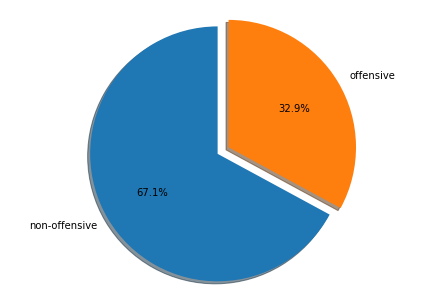

In [28]:
labels = 'non-offensive' , 'offensive'
sizes = [9460 , 4640 ]
explode = (0, 0.1 )  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow = True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(pad = 0)
plt.savefig('OLID_PieChart.svg')  
plt.show()

## Some primary preprocessing using tweet-preprocessor library
### removing hashtages, Emojis, URLs

### Romoving digits and lower the text 

### Removing punctuations such as ! ? @ 

In [46]:
def remove_punctuation(words):   
    pattern = '[0-9]'   
    words = p.clean(words)   # first use the python tweets preprocessoer module to make the tweets clean 
    words=words.lower()  # lower case the tweets    
    words = re.sub(pattern, '',words) # removing the digits     
    new_word = re.sub(r'[^\w\s]', '', (words)) 
    new_word = re.sub(r'url','', new_word)
    new_word = re.sub('\n', '', new_word)     
    #new_word = re.sub(r'[\+w]','', new_word)
    new_word = re.sub(r'\b\w{1,2}\b', '', new_word)
    new_word = re.sub(' +', ' ', new_word) # removing the extra spaces in the text
    new_word = new_word.strip()        
    return new_word

In [47]:
OLID_data['text'] = OLID_data['tweet'].apply(lambda x: remove_punctuation(x))

In [49]:
OLID_data.tail(5)

,id,tweet,label,text
13235,NaN,@USER Sometimes I get strong vibes from people...,OFF,sometimes get strong vibes from people and thi...
13236,NaN,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,benidorm creamfields maga not too shabby summer
13237,NaN,@USER And why report this garbage. We don't g...,OFF,and why report this garbage dont give crap
13238,NaN,@USER Pussy,OFF,pussy
13239,NaN,#Spanishrevenge vs. #justice #HumanRights and ...,NOT,and


In [51]:
OLID_data['label'].replace('OFF', 1 ,inplace = True)
OLID_data['label'].replace('NOT', 0,inplace = True)

In [52]:
OLID_data.tail(5)

,id,tweet,label,text
13235,NaN,@USER Sometimes I get strong vibes from people...,1,sometimes get strong vibes from people and thi...
13236,NaN,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,0,benidorm creamfields maga not too shabby summer
13237,NaN,@USER And why report this garbage. We don't g...,1,and why report this garbage dont give crap
13238,NaN,@USER Pussy,1,pussy
13239,NaN,#Spanishrevenge vs. #justice #HumanRights and ...,0,and


# Visualization of offensive words  and Word Cloud

In [58]:
OFF_df=OLID_data[OLID_data['label'] == 1]
OFF_df.shape

(4640, 4)

In [61]:
NOF_df=OLID_data[OLID_data['label'] == 0]
NOF_df.shape

(9460, 4)

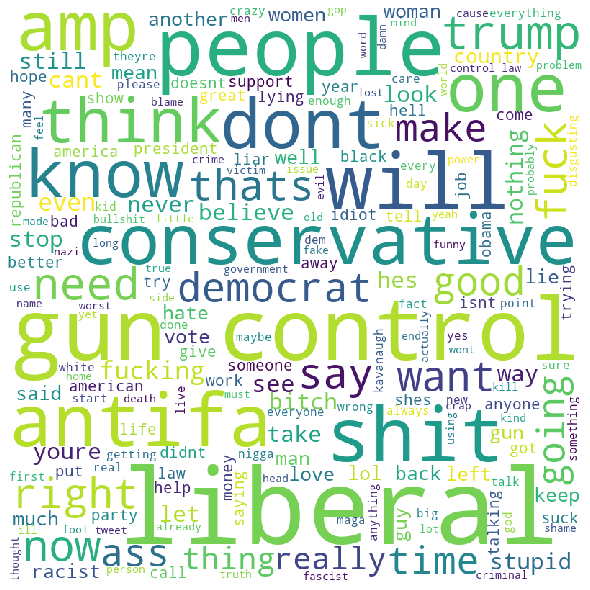

In [62]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"train_df.csv", encoding ="latin-1") 
df = OFF_df['text']  
comment_words = '' 
stopwords = set(STOPWORDS)   
for val in df:  
    val = str(val)       
    tokens = val.split()       
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens)+" "  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
#plt.save("word_cloud.jpeg")
plt.savefig('offensive_words.png')
  
plt.show() 


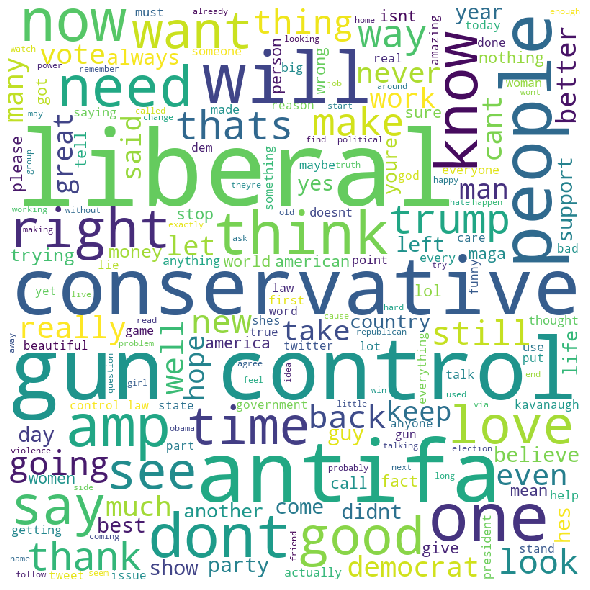

In [63]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"train_df.csv", encoding ="latin-1") 
df = NOF_df['text']  
comment_words = '' 
stopwords = set(STOPWORDS)   
for val in df:  
    val = str(val)       
    tokens = val.split()       
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens)+" "  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
#plt.save("word_cloud.jpeg")
plt.savefig('non_offensive_words.png')
  
plt.show() 

In [ ]:
train_data.columns

In [64]:
OLID_data.head(5)

,id,tweet,label,text
0,15923.0,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1,democrats support antifa muslim brotherhood is...
1,27014.0,"#ConstitutionDay is revered by Conservatives, ...",0,revered conservatives hated progressivessocial...
2,30530.0,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0,first reduces the
3,13876.0,#Watching #Boomer getting the news that she is...,0,getting the news that she still for parole alw...
4,60133.0,#NoPasaran: Unity demo to oppose the far-right...,1,unity demo oppose the farright enough enough


In [67]:
OLID_data = OLID_data [['text', 'label']]

In [68]:
OLID_data.head(5)

,text,label
0,democrats support antifa muslim brotherhood is...,1
1,revered conservatives hated progressivessocial...,0
2,first reduces the,0
3,getting the news that she still for parole alw...,0
4,unity demo oppose the farright enough enough,1


In [70]:
OLID_data.to_pickle("OLID_data.pkl")